# About Dataset :

The Fossil dataset was created to provide a comprehensive and realistic foundation for training and evaluating machine learning models aimed at predicting fossil ages. The dataset is of intermediate difficulty and includes a variety of geological, chemical, and physical attributes that are significant in the study of fossil formation and preservation.


# Features

**uranium_lead_ratio**: Ratio of uranium to lead isotopes in the fossil sample.

**carbon_14_ratio**: Ratio of carbon-14 isotopes present in the fossil sample.

**radioactive_decay_series**: Measurement of the decay series from parent to daughter isotopes.

**stratigraphic_layer_depth**: Depth of the fossil within the stratigraphic layer, in meters.

**isotopic_composition**: Proportion of different isotopes within the fossil sample.

**fossil_size**: Size of the fossil, in centimeters.

**fossil_weight**: Weight of the fossil, in grams.

**geological_period**: Geological period during which the fossil was formed.

**surrounding_rock_type**: Type of rock surrounding the fossil.

**paleomagnetic_data**: Paleomagnetic orientation data of the fossil site.

**stratigraphic_position**: Position of the fossil within the stratigraphic column.

**age**: Calculated age of the fossil based on various features, in years.

In [81]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('train_data.csv')
dc=df.copy()

In [83]:
df

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0.049660,0.601750,0.762490,222.54,Jurassic,Reversed polarity,True,2.247495,Sandstone,Bottom,91.69,415.13,26606
4394,0.360085,0.215033,1.002406,276.70,Cretaceous,Reversed polarity,True,1.004584,Conglomerate,Bottom,68.97,121.10,44850
4395,0.464864,0.553313,0.659639,76.77,Devonian,Normal polarity,True,0.721947,Conglomerate,Middle,11.37,288.73,32186
4396,0.803338,0.272392,0.123562,204.82,Neogene,Reversed polarity,True,1.496427,Sandstone,Bottom,132.34,518.31,59888


# EDA

In [55]:
df.head(5)

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [57]:
# check duplicated data
df.duplicated().sum()

0

In [58]:
# check missing values
df.isnull().sum()

,0
uranium_lead_ratio,0
carbon_14_ratio,0
radioactive_decay_series,0
stratigraphic_layer_depth,0
geological_period,0
paleomagnetic_data,0
inclusion_of_other_fossils,0
isotopic_composition,0
surrounding_rock_type,0
stratigraphic_position,0


In [59]:
# check the unique values in categorical column
cols = ['paleomagnetic_data', 'geological_period' , 'surrounding_rock_type' , 'stratigraphic_position']

for col in cols:
    print(f'the unique values of {col} is: {df[col].unique()}')
    print('')

the unique values of paleomagnetic_data is: ['Normal polarity' 'Reversed polarity']

the unique values of geological_period is: ['Cretaceous' 'Cambrian' 'Permian' 'Devonian' 'Jurassic' 'Neogene'
 'Triassic' 'Paleogene' 'Ordovician' 'Carboniferous' 'Silurian']

the unique values of surrounding_rock_type is: ['Conglomerate' 'Limestone' 'Shale' 'Sandstone']

the unique values of stratigraphic_position is: ['Middle' 'Top' 'Bottom']



In [60]:
## pie chart of categorical data
def pie_plot(col):
    pallete_color = sns.color_palette('Set2')
    df[col].value_counts().plot.pie(y=col ,autopct='%1.0f%%',colors = pallete_color , figsize=(6,6));




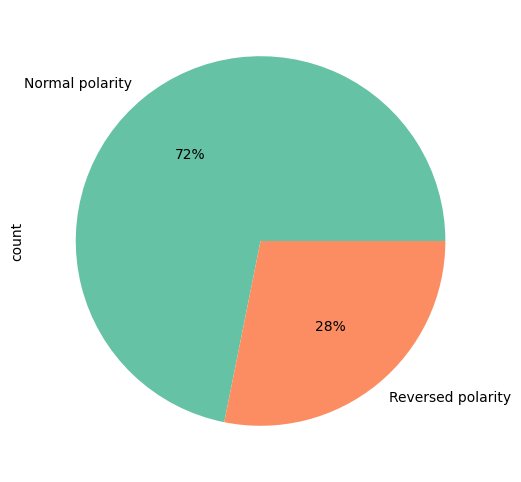

In [62]:
# pie plot of paleomagnetic_data
pie_plot('paleomagnetic_data')

* 72% from all fossiles are nrmal polarity & the others are reversed.

can be handled using binary encoded.

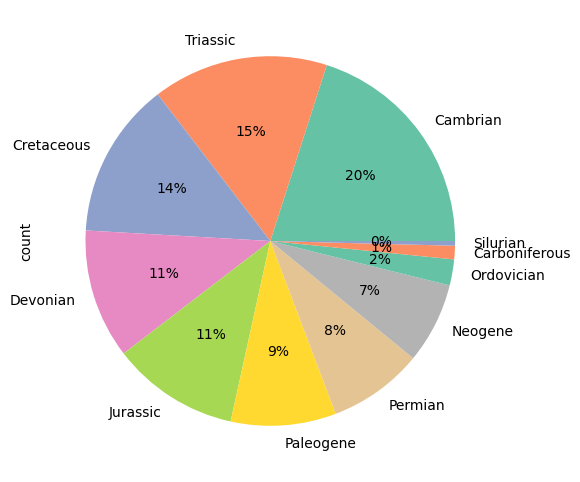

In [63]:
# pie plot of geological_period
pie_plot('geological_period')

In [64]:
df.geological_period.value_counts()

,count
geological_period,
Cambrian,882
Triassic,676
Cretaceous,601
Devonian,498
Jurassic,490
Paleogene,405
Permian,365
Neogene,311
Ordovician,100


Text(0.5, 1.0, 'Bar plot of geological period')

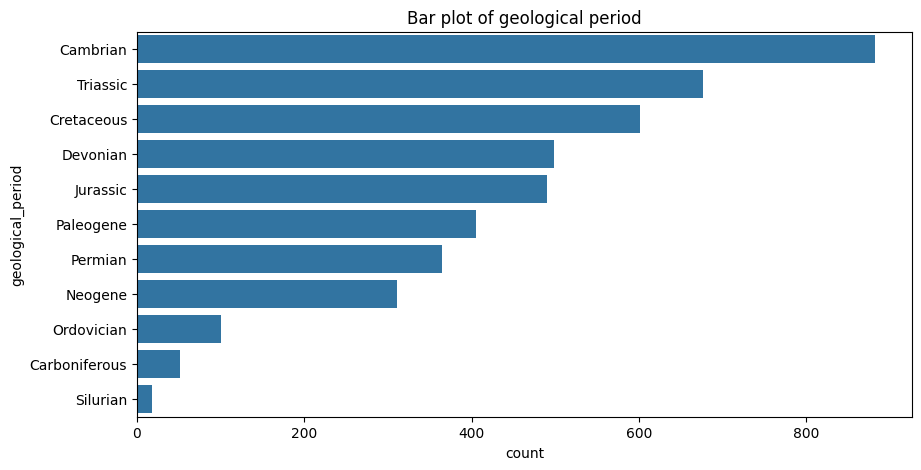

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, y ='geological_period', order = df['geological_period'].value_counts().index)
plt.title('Bar plot of geological period')



from the plots above, we deduced that the highest most frequent values in geological_period is **Cambian** (882 times), and the least one is **Silurian**.
we could drop the rows of values silurian.

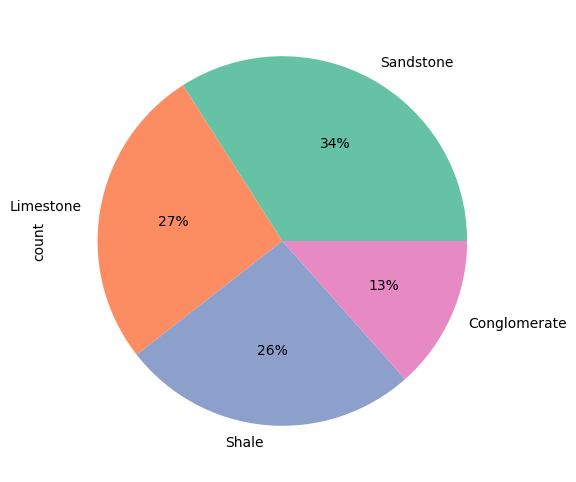

In [66]:
# pie plot of surrounding_rock_type
pie_plot('surrounding_rock_type')

Text(0.5, 1.0, 'Bar plot of surrounding rock type')

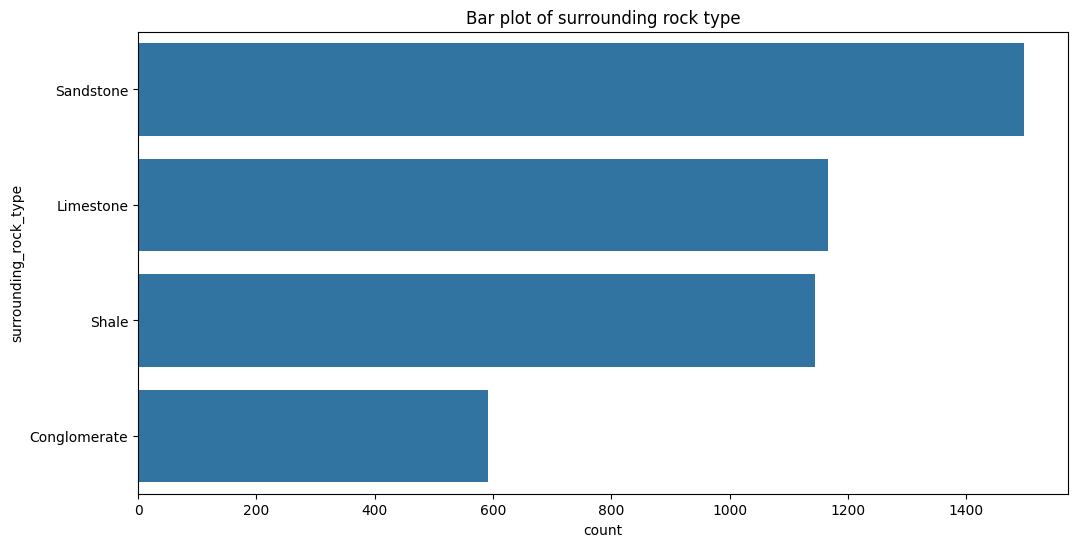

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, y ='surrounding_rock_type', order = df['surrounding_rock_type'].value_counts().index)
plt.title('Bar plot of surrounding rock type')

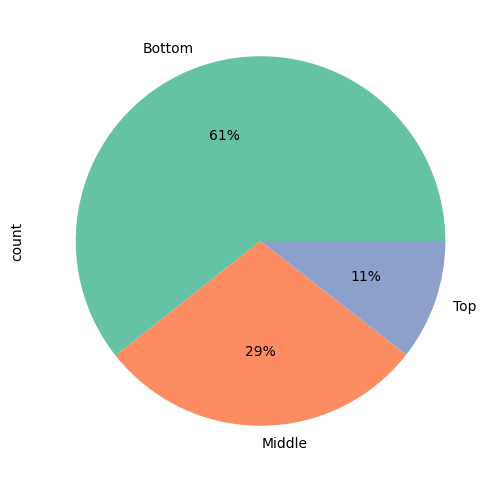

In [68]:
## pie plot of stratigraphic_position
pie_plot('stratigraphic_position')

* **61%** from the fossiles was founded in the bottom , just **11%** of them founded in top and the others in the middle.

In [69]:
### description of numerical data
df.describe()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,age
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,0.486938,0.430116,0.532054,152.832801,0.938315,70.702460,326.655177,40586.656435
std,0.257132,0.233536,0.287929,86.272234,0.521643,37.352584,187.032333,15200.700905
min,0.000241,0.000244,0.000076,0.130000,0.000275,0.130000,0.620000,4208.000000
25%,0.294091,0.246269,0.316775,85.390000,0.533519,42.487500,181.047500,29766.250000
50%,0.473715,0.416046,0.511830,146.000000,0.905684,68.785000,308.260000,39567.000000
75%,0.658012,0.590752,0.723805,211.932500,1.289307,96.440000,455.520000,50550.500000
max,1.533270,1.000000,1.513325,494.200000,3.071434,216.390000,1010.090000,103079.000000


there are tree columns, we doubt that have outliers. **stratigraphic_layer_depth** , **fossil_size**  , **fossil_weight**

In [70]:
## box plot of three columns :
import plotly.express as px
fig = px.box(df, y="stratigraphic_layer_depth")
fig.show()


<ipython-input-71-f4fc90dedc39>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Box plot of stratigraphic_layer_depth')

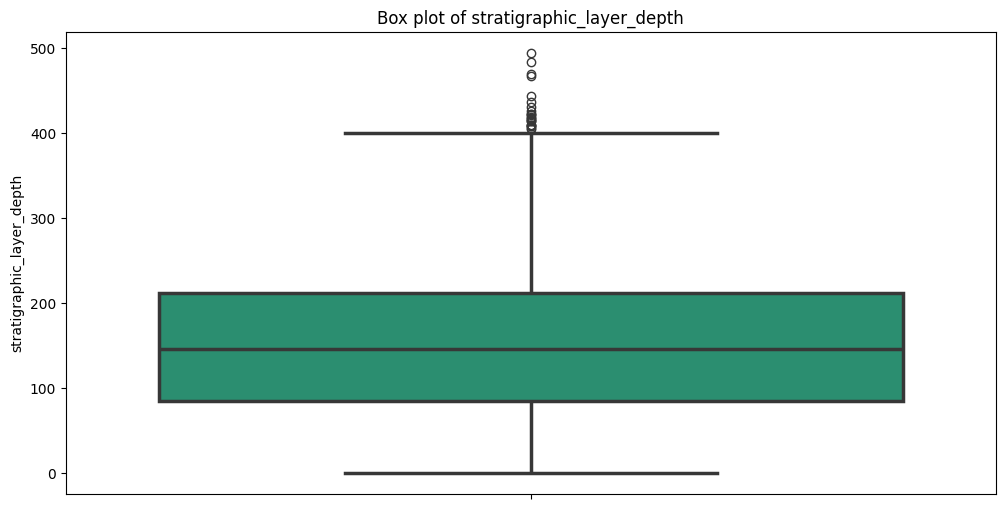

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['stratigraphic_layer_depth'], linewidth=2.5, palette='Dark2');
plt.title('Box plot of stratigraphic_layer_depth')

In [26]:
# Box plot of fossil_size
fig = px.box(df, y="fossil_size")
fig.show()

<ipython-input-27-62ccc46dc86f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Box plot of fossil Size')

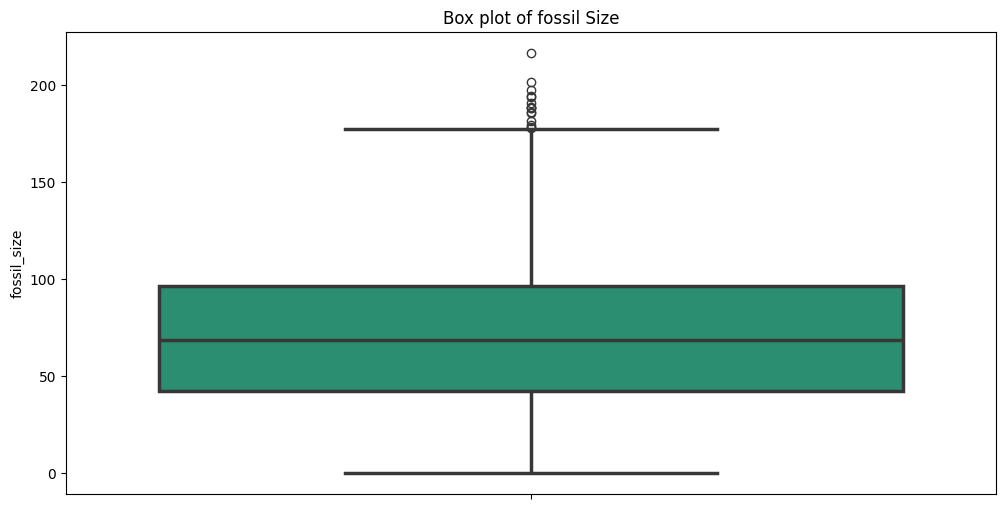

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['fossil_size'], linewidth=2.5, palette='Dark2');
plt.title('Box plot of fossil Size')

In [28]:
# BOX PLOT OF Fossil_weight
fig = px.box(df, y="fossil_weight")
fig.show()

<ipython-input-29-7877ce242e5f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Box plot of fossil Weight')

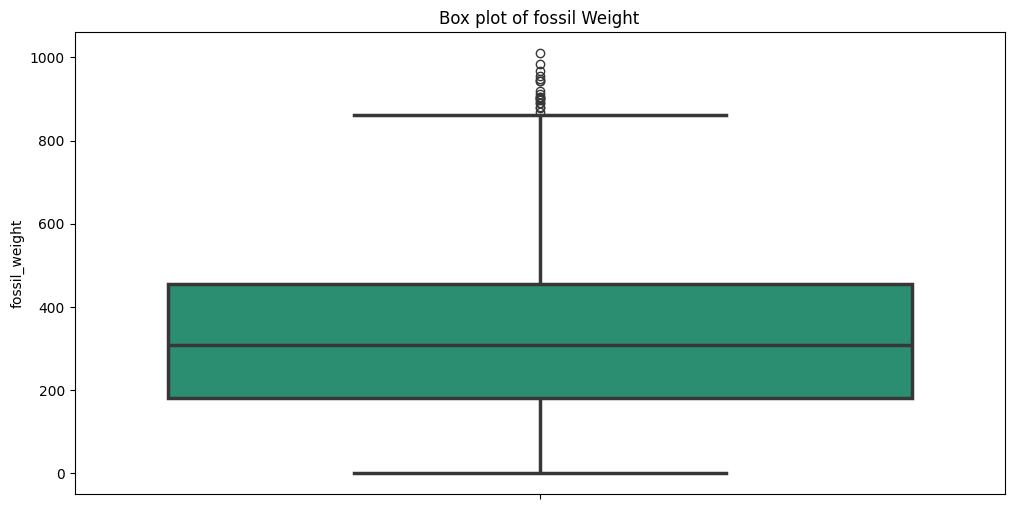

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['fossil_weight'], linewidth=2.5, palette='Dark2');
plt.title('Box plot of fossil Weight')

* All outliers can be handled using **Feature scaling**

<ipython-input-33-368c5a014b3e>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



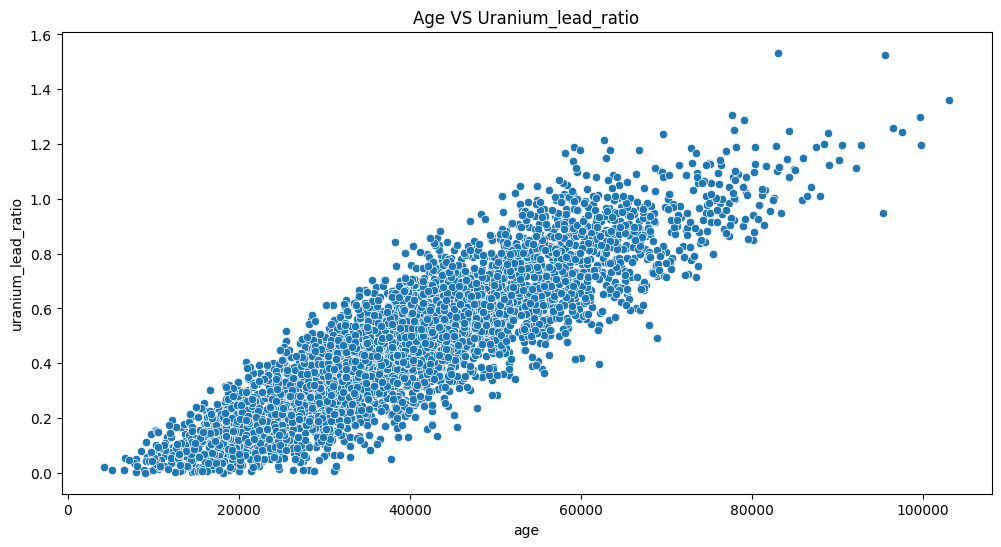

In [33]:
# gettting the relation between uranium_lead_ratio & age of fossile
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='uranium_lead_ratio',data=df,palette='rocket')
plt.title('Age VS Uranium_lead_ratio')
plt.show()


* This indicates that there is a **positive** relationship between unranium ratio and age of the fossil.

<ipython-input-34-609ff87b8d59>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



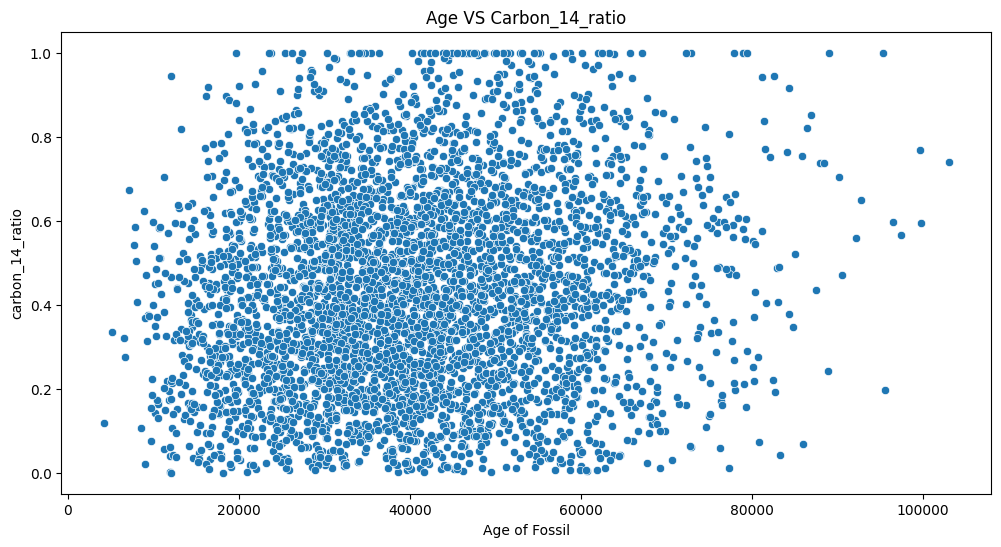

In [34]:
# find the relation betweeen carbon_14 ratio & age of fossile
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='carbon_14_ratio',data=df ,palette='plasma')
plt.title('Age VS Carbon_14_ratio')
plt.xlabel('Age of Fossil')
plt.show()



```
# This is formatted as code
```

* there is no relation  between age and  carbon_14_ratio

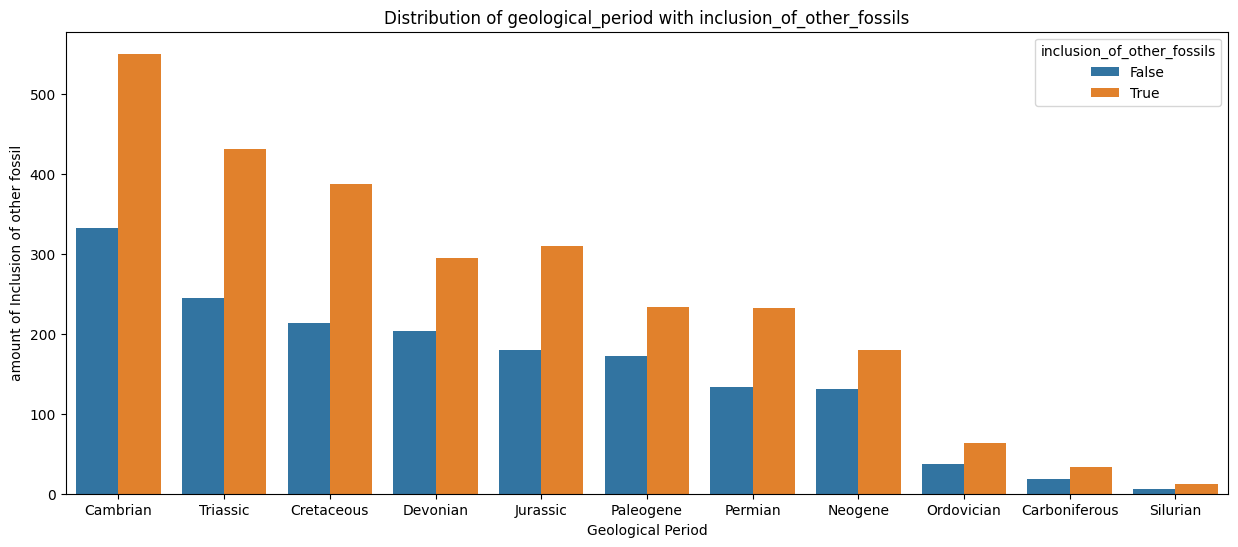

In [35]:
plt.figure(figsize=(15, 6))

sns.countplot(x='geological_period', order=df['geological_period'].value_counts().index, data=df, hue='inclusion_of_other_fossils')
plt.title('Distribution of geological_period with inclusion_of_other_fossils')
plt.xlabel('Geological Period')
plt.ylabel('amount of Inclusion of other fossil')
plt.show()

* Plot above indicates that all gelogocal periods contains **high amount** of inclusion of other fossil.

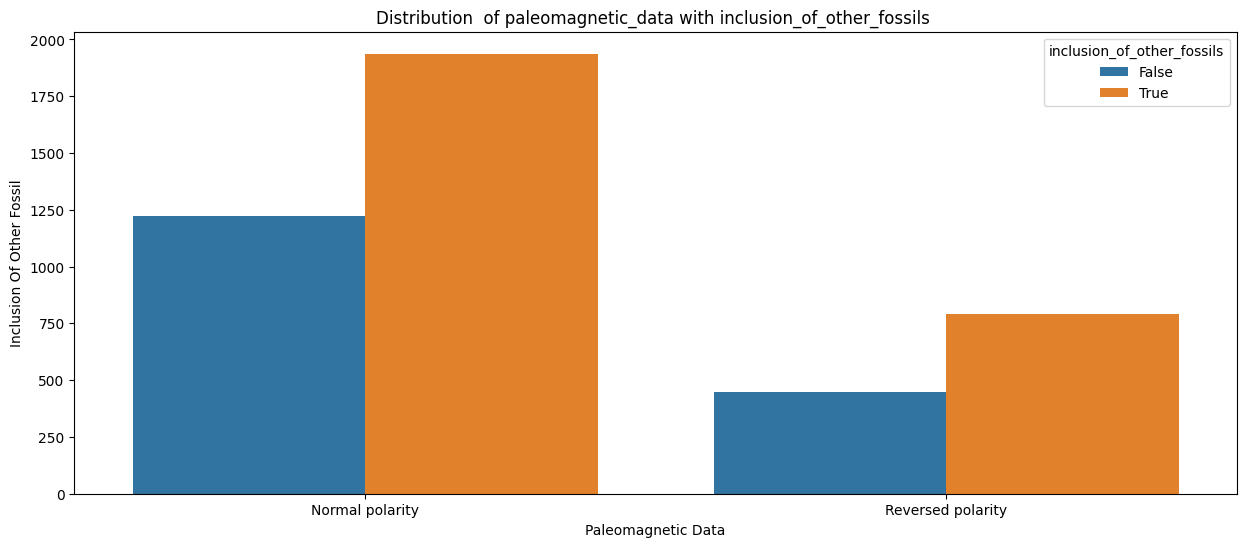

In [37]:
plt.figure(figsize=(15, 6))

sns.countplot(x='paleomagnetic_data',order=df['paleomagnetic_data'].value_counts().index,data=df,hue='inclusion_of_other_fossils')
plt .xlabel('Paleomagnetic Data')
plt.ylabel('Inclusion Of Other Fossil')
plt.title('Distribution  of paleomagnetic_data with inclusion_of_other_fossils ')
plt.show()


* This is expected because the largest percentage from our data are normal polarity and contain inclusion of other polarity.

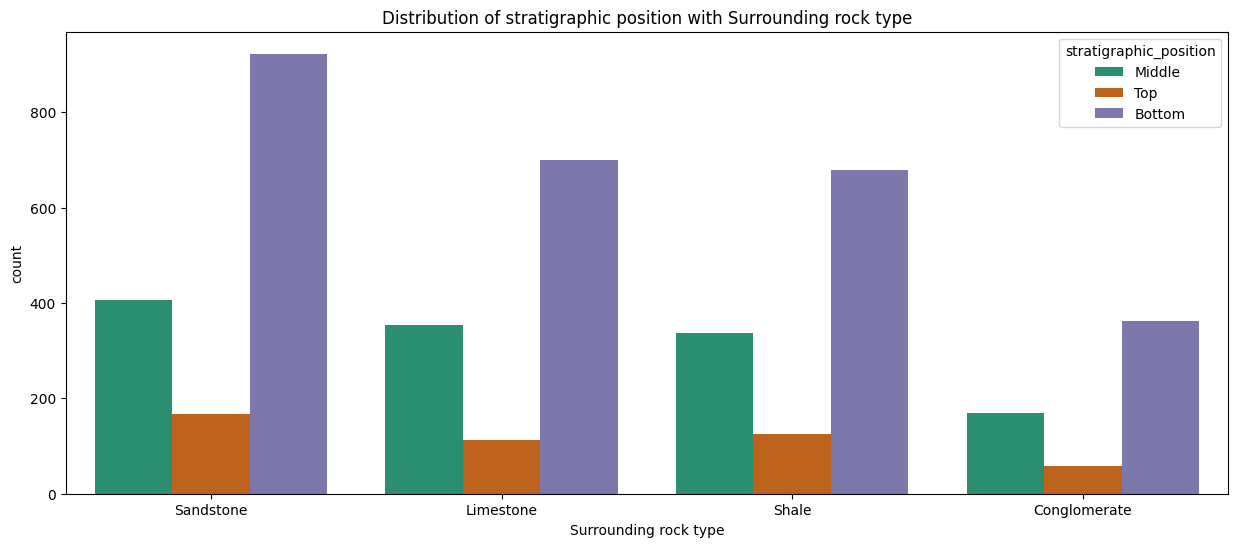

In [38]:
plt.figure(figsize=(15, 6))
sns.countplot(x='surrounding_rock_type', order=df['surrounding_rock_type'].value_counts().index, data=df, hue='stratigraphic_position', palette='Dark2')
plt.title('Distribution of stratigraphic position with Surrounding rock type')
plt.xlabel('Surrounding rock type')
plt.show()

* Most fossils are founded in the bottom, So that at each rock type, the largest amount are founded in bottom and then middle.

# Data preprocessing

### 1- Handling categorical columns
['paleomagnetic_data', 'geological_period' , 'surrounding_rock_type' , 'stratigraphic_position']

In [84]:
## we will convert 'paleomagnetic_data' into binary encoding data
paleomagnetic_wrapper = {'Normal polarity': 1 ,  'Reversed polarity': 0}
df['paleomagnetic_data'] = df['paleomagnetic_data'].replace(paleomagnetic_wrapper)


In [85]:
# convert inclusion_of_other_fossils of boolean type to int type
df['inclusion_of_other_fossils'] = df['inclusion_of_other_fossils'].replace({True: 1 , False: 0})


In [86]:
## converting of geological_period to label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['geological_period'] = label_encoder.fit_transform(df['geological_period'])

In [87]:
df['geological_period'].value_counts()

,count
geological_period,
0,882
10,676
2,601
3,498
4,490
7,405
8,365
5,311
6,100


In [88]:
df.head(5)

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,2,1,0,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,0,1,0,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,0,1,1,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,8,1,1,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,3,1,1,1.646640,Shale,Top,90.84,277.67,67217


In [89]:
# convert surrounding_rock_type to one hot encoding data
dummies = pd.get_dummies(df['surrounding_rock_type'], sparse=True)
d=dummies.astype(int)
df = pd.concat([d,df] , axis =1)

In [90]:
df.drop('surrounding_rock_type' , axis = 1 , inplace = True)

In [91]:
## stratigraphic_position Handling
stratigraphic_position_wrapper = {'Middle':1 ,  'Top':0 , 'Bottom':2}
df['stratigraphic_position'] = df['stratigraphic_position'].replace(stratigraphic_position_wrapper)

In [92]:
df

,Conglomerate,Limestone,Sandstone,Shale,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,stratigraphic_position,fossil_size,fossil_weight,age
0,1,0,0,0,0.738061,0.487707,0.907884,91.17,2,1,0,0.915951,1,50.65,432.00,43523
1,0,1,0,0,0.560096,0.341738,1.121302,165.44,0,1,0,0.803968,0,48.85,353.29,44112
2,0,0,0,1,0.424773,0.218493,0.103855,218.98,0,1,1,0.792441,2,37.66,371.33,43480
3,0,1,0,0,0.349958,0.704649,0.383617,51.09,8,1,1,0.074636,2,39.10,232.84,30228
4,0,0,0,1,0.886811,0.777494,0.593254,313.72,3,1,1,1.646640,0,90.84,277.67,67217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0,0,1,0,0.049660,0.601750,0.762490,222.54,4,0,1,2.247495,2,91.69,415.13,26606
4394,1,0,0,0,0.360085,0.215033,1.002406,276.70,2,0,1,1.004584,2,68.97,121.10,44850
4395,1,0,0,0,0.464864,0.553313,0.659639,76.77,3,1,1,0.721947,1,11.37,288.73,32186
4396,0,0,1,0,0.803338,0.272392,0.123562,204.82,5,0,1,1.496427,2,132.34,518.31,59888


### 2-Handling Outlier
**stratigraphic_layer_depth** , **fossil_size**  , **fossil_weight**

* we will apply robust scalar on three columns above.

In [93]:
q1 = df.stratigraphic_layer_depth.quantile(0.25)
q3 = df.stratigraphic_layer_depth.quantile(0.75)
df['stratigraphic_layer_depth'] = df['stratigraphic_layer_depth'].apply(lambda x: (x-q1)/(q3-q1))

In [94]:
size_q1 = df.fossil_size.quantile(0.25)
size_q3 = df.fossil_size.quantile(0.75)
df['fossil_size'] = df['fossil_size'].apply(lambda x: (x-size_q1)/(size_q3-size_q1))

In [95]:
weight_q1 = df.fossil_weight.quantile(0.25)
weight_q3 = df.fossil_weight.quantile(0.75)
df['fossil_weight'] = df['fossil_weight'].apply(lambda x: (x-weight_q1)/(weight_q3-weight_q1))

In [96]:
df

,Conglomerate,Limestone,Sandstone,Shale,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,stratigraphic_position,fossil_size,fossil_weight,age
0,1,0,0,0,0.738061,0.487707,0.907884,0.045676,2,1,0,0.915951,1,0.151290,0.914308,43523
1,0,1,0,0,0.560096,0.341738,1.121302,0.632594,0,1,0,0.803968,0,0.117928,0.627540,44112
2,0,0,0,1,0.424773,0.218493,0.103855,1.055693,0,1,1,0.792441,2,-0.089477,0.693266,43480
3,0,1,0,0,0.349958,0.704649,0.383617,-0.271055,8,1,1,0.074636,2,-0.062787,0.188698,30228
4,0,0,0,1,0.886811,0.777494,0.593254,1.804374,3,1,1,1.646640,0,0.896205,0.352030,67217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0,0,1,0,0.049660,0.601750,0.762490,1.083826,4,0,1,2.247495,2,0.911960,0.852845,26606
4394,1,0,0,0,0.360085,0.215033,1.002406,1.511824,2,0,1,1.004584,2,0.490848,-0.218410,44850
4395,1,0,0,0,0.464864,0.553313,0.659639,-0.068119,3,1,1,0.721947,1,-0.576757,0.392325,32186
4396,0,0,1,0,0.803338,0.272392,0.123562,0.943794,5,0,1,1.496427,2,1.665400,1.228766,59888


In [97]:
edited = df.to_csv('Train_edited.csv')

### Now, we will do the same steps on Test data

In [100]:
test = pd.read_csv('test_data.csv')

In [101]:
test.head(5)

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.469986,1.000000,0.667595,29.58,Triassic,Normal polarity,False,0.583560,Limestone,Bottom,120.12,73.83,41072
1,0.619865,0.474208,1.218381,69.87,Cretaceous,Reversed polarity,True,0.942719,Shale,Middle,72.82,191.68,42085
2,0.767736,0.478731,0.119801,96.38,Cretaceous,Normal polarity,False,0.377531,Sandstone,Bottom,105.47,82.25,50436
3,0.275121,0.400594,0.634760,134.10,Triassic,Normal polarity,True,0.323820,Sandstone,Middle,94.99,47.99,25923
4,0.407470,0.039705,0.824597,124.10,Triassic,Normal polarity,False,1.219120,Shale,Middle,139.93,532.62,30272


In [102]:
############## Handling categorical data ###########################

## convert 'paleomagnetic_data' into binary encoding data
paleomagnetic_wrapper = {'Normal polarity': 1 ,  'Reversed polarity': 0}
test['paleomagnetic_data'] = test['paleomagnetic_data'].replace(paleomagnetic_wrapper)

# convert inclusion_of_other_fossils of boolean type to int type
test['inclusion_of_other_fossils'] = test['inclusion_of_other_fossils'].replace({True: 1 , False: 0})

## converting of geological_period to label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test['geological_period'] = label_encoder.fit_transform(test['geological_period'])

# convert surrounding_rock_type to one hot encoding data
dummies = pd.get_dummies(test['surrounding_rock_type'], sparse=True)
d=dummies.astype(int)
test = pd.concat([d,test] , axis =1)

## stratigraphic_position Handling
stratigraphic_position_wrapper = {'Middle':1 ,  'Top':0 , 'Bottom':2}
test['stratigraphic_position'] = test['stratigraphic_position'].replace(stratigraphic_position_wrapper)

In [103]:
test.drop('surrounding_rock_type' , axis = 1 , inplace = True)

In [104]:
##################### Handling numerical data #############################
q1 = test.stratigraphic_layer_depth.quantile(0.25)
q3 = test.stratigraphic_layer_depth.quantile(0.75)
test['stratigraphic_layer_depth'] = test['stratigraphic_layer_depth'].apply(lambda x: (x-q1)/(q3-q1))


size_q1 = test.fossil_size.quantile(0.25)
size_q3 = test.fossil_size.quantile(0.75)
test['fossil_size'] = test['fossil_size'].apply(lambda x: (x-size_q1)/(size_q3-size_q1))


weight_q1 = test.fossil_weight.quantile(0.25)
weight_q3 = test.fossil_weight.quantile(0.75)
test['fossil_weight'] = test['fossil_weight'].apply(lambda x: (x-weight_q1)/(weight_q3-weight_q1))

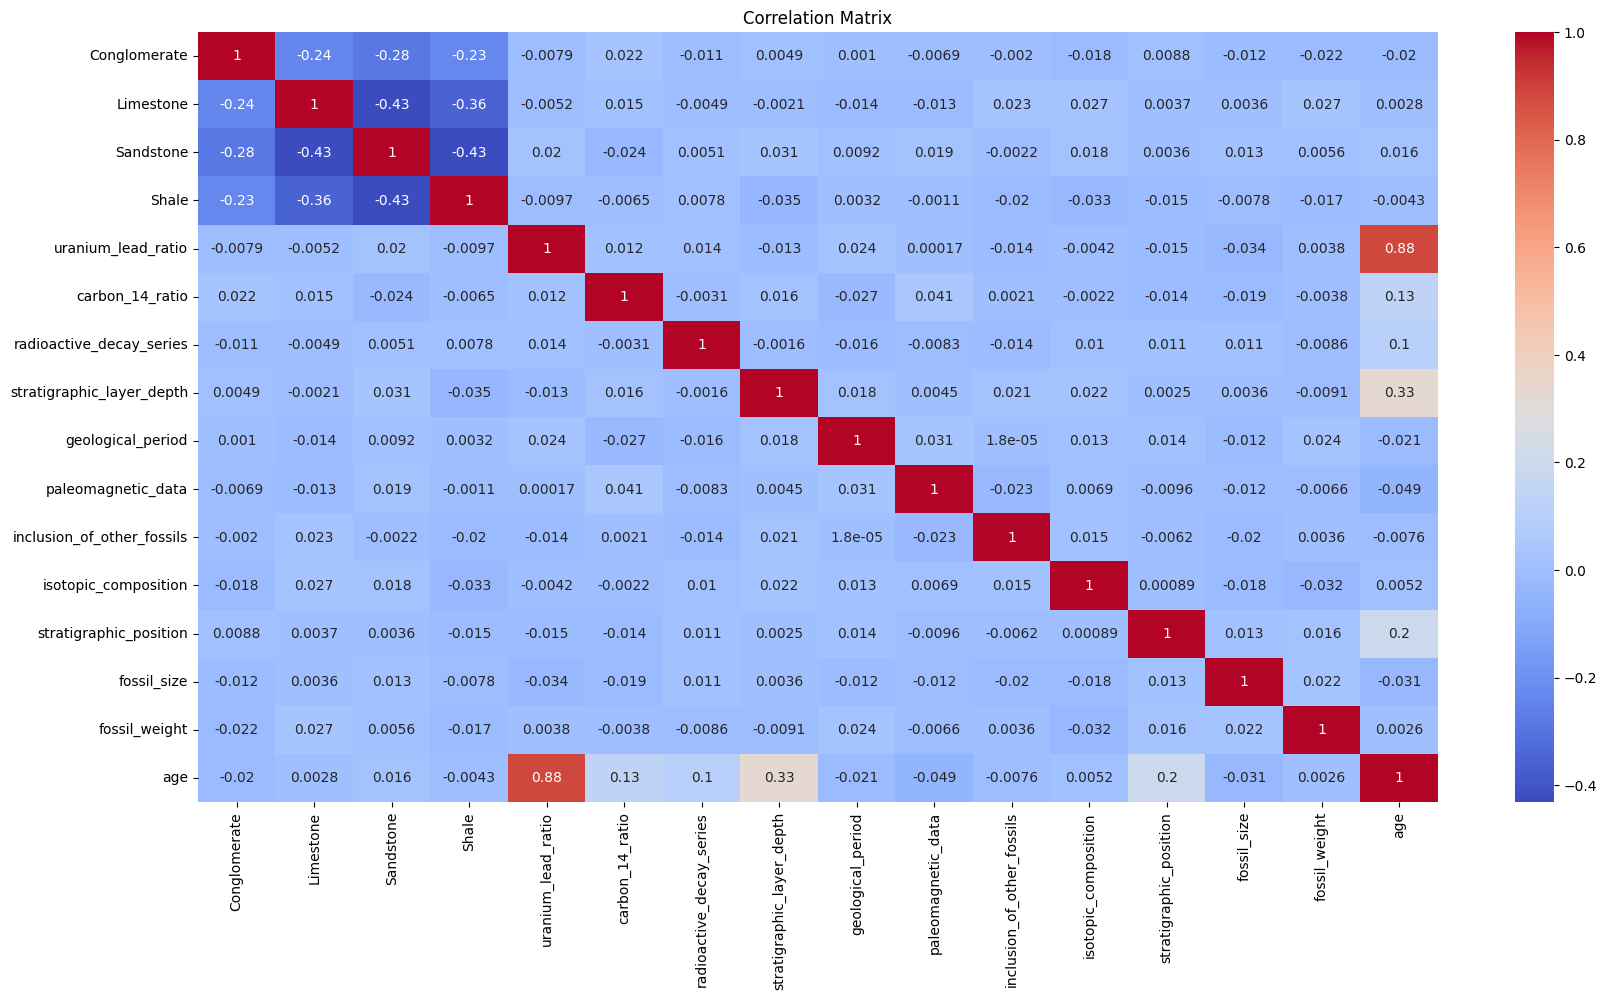

In [105]:
### corellation
correlation_matrix=df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


In [106]:
test_edited = test.to_csv('test_edited.csv')

# Machine learning models

In [107]:
train_data = pd.read_csv('Train_edited.csv')
test_data = pd.read_csv('test_edited.csv')

In [108]:
# train & test data split
x_train = df.drop('age' , axis=1)
y_train = df['age']
x_test = test_data.drop('age' , axis =1)
y_test = test_data['age']

In [109]:
x_test.drop('Unnamed: 0', axis = 1 , inplace = True)

### Building Linear Regression Model

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(x_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
# accuracy = accuracy_score(y_test , y_pred_linear)
print("Linear Regression Model")
print("Mean Squared Error:", mse_linear)
print("R^2 Score:", r2_linear)

Linear Regression Model
Mean Squared Error: 7867015.012296264
R^2 Score: 0.9676172832033293


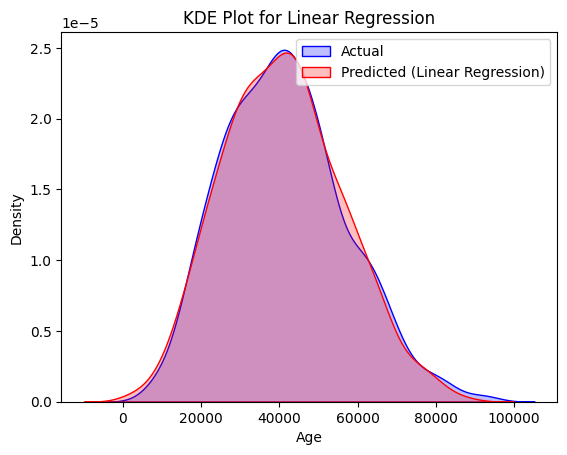

In [111]:
# Plot KDE for Linear Regression
sns.kdeplot(y_test, label='Actual', color='blue', fill=True)
sns.kdeplot(y_pred_linear, label='Predicted (Linear Regression)', color='red', fill=True)
plt.title('KDE Plot for Linear Regression')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()